### Exercise 1: Bar Graph

**Objective**: Create a bar graph representing the sales data of a retail company.

**Tasks**:
- Use a fictional dataset where the x-axis represents product categories and the y-axis represents total sales amounts.
- Customize the bar graph with appropriate labels for the axes, a title, and color.
- Display the graph using Matplotlib.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

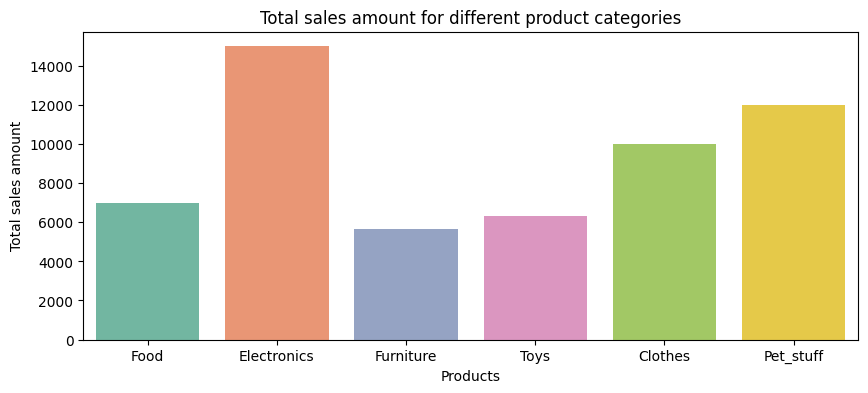

In [2]:
product_cat = ['Food', 'Electronics', 'Furniture', 'Toys', 'Clothes', 'Pet_stuff']
amount = [7000, 15000, 5650, 6300, 10000, 12000]


plt.figure(figsize = (10, 4))
sns.barplot(x = product_cat, y = amount, palette = 'Set2', hue = product_cat, legend = False)
plt.title('Total sales amount for different product categories')
plt.xlabel('Products')
plt.ylabel('Total sales amount')

plt.show()

### Exercise 2: Hierarchical Indexing

**Objective**: Filter and retrieve all days when the temperature exceeded 30°C (86°F) for cities in Canada using hierarchical indexing.

**Tasks**:
- Create a pandas DataFrame with hierarchical indexing on ‘Country’, ‘City’, and ‘Date’.
- Write Python code to filter the dataset for the specified condition.
- Explain how hierarchical indexing simplifies multi-level data analysis.

In [3]:
import numpy as np
import random

In [4]:
# creating dataset

countries = ['UK', 'UK', 'USA', 'USA', 'Canada', 'Canada', 'Germany', 'Germany']
cities = ['London', 'Cambridge', 'New York', 'Los Angeles', 'Toronto', 'Vancouver', 'Berlin', 'Munchen']
dates_per_city = pd.date_range(start='2025-11-01', periods=3) 

data = []
for country, city in zip(countries, cities):
    for date in dates_per_city:
        temp = np.random.randint(27, 32)
        data.append([country, city, date, temp])

temp_d = pd.DataFrame(data, columns = ['Country', 'City', 'Date', 'Tempreture'])

temp_d = temp_d.set_index(['Country', 'City', 'Date'])

In [5]:
canada_data = temp_d.loc['Canada'] # filtering Canada

In [6]:
canada_over_thirty = canada_data [canada_data['Tempreture'] > 30] # filtering tempreture over 30

In [7]:
canada_over_thirty # get the result

,,Tempreture
City,Date,


### Exercise 3: Advanced Filtering with Hierarchical Indices

**Objective**: Filter rows in a hierarchical DataFrame based on specific criteria.

**Tasks**:
- Use the DataFrame from Exercise 4 of the XP exercises.
- Write Python code to filter and display rows where ‘Salary’ is above 50,000 within each ‘Department’.
- Demonstrate how hierarchical indexing facilitates efficient filtering.

In [8]:
salaries_d = pd.read_csv('datascience_salaries.csv')

In [9]:
salaries_d.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [10]:
salaries_d['job_title'].value_counts()

job_title
Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: count, dtype: int64

In [11]:
salaries_d['salary'].value_counts()

salary
68000     219
63000     165
51000     112
30000     106
45000      96
         ... 
168000      1
183000      1
163000      1
103000      1
147000      1
Name: count, Length: 87, dtype: int64

In [12]:
salaries_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [13]:
new_indexies = ['job_title', 'salary']
salary_title = salaries_d.set_index(new_indexies).sort_index()
salary_title

Unnamed: 0   job_type experience_level  \
job_title        salary                                           
Big data         30000         1202  Full Time           Senior   
                 30000         1204  Full Time           Senior   
                 30000         1215  Full Time           Senior   
                 30000         1234  Full Time            Entry   
                 30000         1240  Full Time           Senior   
...                             ...        ...              ...   
Machine learning 196000        1585  Full Time           Senior   
                 196000        1881  Full Time           Senior   
                 200000        1630  Full Time           Senior   
                 201000        1536  Full Time           Senior   
                 228000        2001  Full Time           Senior   

                              location salary_currency  
job_title        salary                                 
Big data         30000          London             USD  
                 30000          London             USD  
                 30000        Tel Aviv             USD  
                 30000        Katowice             USD  
                 30000            Kyiv             USD  
...                                ...             ...  
Machine learning 196000       Brooklyn             USD  
                 196000       Brooklyn             USD  
                 200000  New York City             USD  
                 201000  San Francisco             USD  
                 228000        Toronto             USD  

[1171 rows x 5 columns]

In [14]:
filtered_salary = salary_title.loc[pd.IndexSlice[:, 50000:], :] # можно по разным индексам производить срез (последнее двоеточие обозначает выбрать все колонки)

In [15]:
filtered_salary

Unnamed: 0   job_type experience_level  \
job_title        salary                                           
Big data         51000         1201  Full Time              Mid   
                 51000         1277  Full Time              Mid   
                 51000         1298  Full Time              Mid   
                 51000         1336  Full Time              Mid   
                 51000         1431  Full Time              Mid   
...                             ...        ...              ...   
Machine learning 196000        1585  Full Time           Senior   
                 196000        1881  Full Time           Senior   
                 200000        1630  Full Time           Senior   
                 201000        1536  Full Time           Senior   
                 228000        2001  Full Time           Senior   

                              location salary_currency  
job_title        salary                                 
Big data         51000          London             USD  
                 51000       Abu Dhabi             USD  
                 51000           Paris             USD  
                 51000         Bangkok             USD  
                 51000         Bangkok             USD  
...                                ...             ...  
Machine learning 196000       Brooklyn             USD  
                 196000       Brooklyn             USD  
                 200000  New York City             USD  
                 201000  San Francisco             USD  
                 228000        Toronto             USD  

[783 rows x 5 columns]

### Exercise 4: Visualizing Movie Durations

**Objective**: Create a distribution plot to visualize the durations of MCU movies.

**Tasks**:
- Import necessary libraries (pandas, Seaborn, Matplotlib).
- Load a dataset containing MCU movie information.
- Use Seaborn’s distplot or histplot to visualize the distribution of movie durations.
- Add a KDE overlay and customize the plot with a title.
- Display the plot.

In [16]:
movies = pd.read_csv('mcu_box_office.csv')

In [17]:
movies.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [18]:
import matplotlib.pyplot as plt

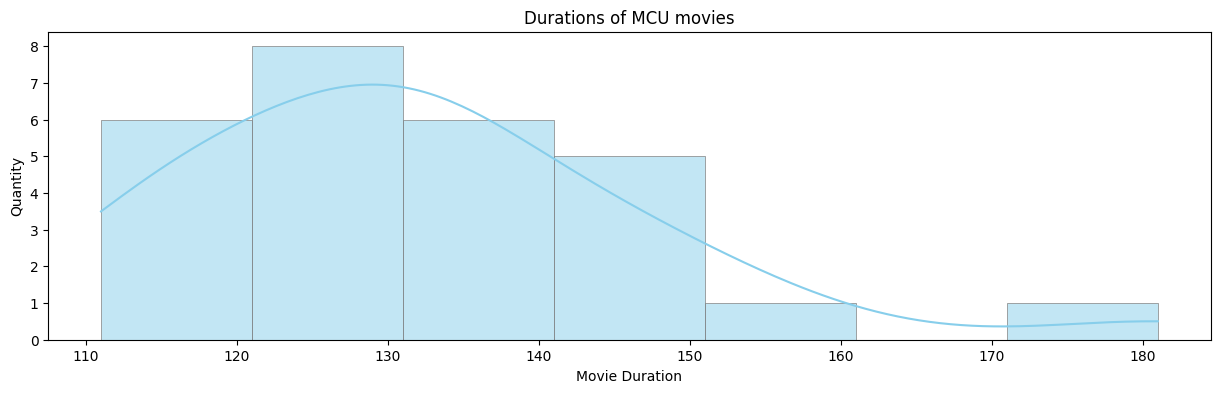

In [19]:
plt.figure(figsize = (15, 4))
sns.histplot(data = movies,  
             x = 'movie_duration', 
             kde = True,
             color = 'skyblue',
             edgecolor='grey', 
             linewidth=0.5
)
plt.title('Durations of MCU movies')
plt.xlabel('Movie Duration')
plt.ylabel('Quantity')

plt.show()

### Exercise 5: Box Plot of Audience and Tomato Meter Scores

**Objective**: Compare the distribution of Tomato Meter scores and Audience scores using a box plot.

**Tasks**:
- Create a new DataFrame that melts the Tomato Meter and Audience scores into a long format.
- Use Seaborn’s boxplot to visualize the distributions of both scores.
- Customize the plot by setting an appropriate color palette and adding a title.
- Display the plot.

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


In [44]:
movies_melted = pd.melt(
    movies,
    id_vars = 'movie_title',
    value_vars = ['tomato_meter', 'audience_score'],
    var_name = 'score_type',
    value_name = 'score'
)

In [42]:
movies_melted

,movie_title,score_type,score
0,Iron Man,tomato_meter,94
1,The Incredible Hulk,tomato_meter,67
2,Iron Man 2,tomato_meter,72
3,Thor,tomato_meter,77
4,Captain America: The First Avenger,tomato_meter,79
5,The Avengers,tomato_meter,91
6,Iron Man 3,tomato_meter,79
7,Thor: The Dark World,tomato_meter,66
8,Captain America: The Winter Soldier,tomato_meter,90
9,Guardians of the Galaxy,tomato_meter,92


In [45]:
movies_melted['score_type'] = movies_melted['score_type'].replace({
    'tomato_meter': 'Tomato Meter',
    'audience_score': 'Audience Score'
})

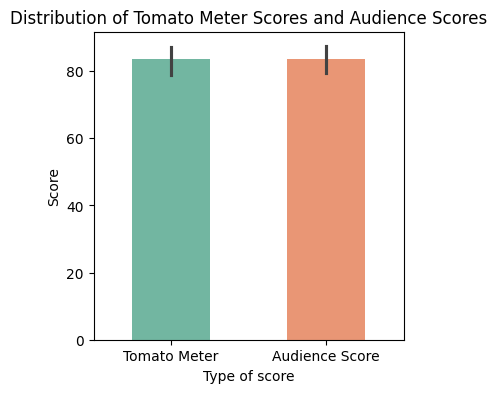

In [47]:
plt.figure(figsize = (4,4))

sns.barplot(data = movies_melted, x = 'score_type', y = 'score', hue = 'score_type',  palette = 'Set2', width=0.5)

plt.title('Distribution of Tomato Meter Scores and Audience Scores')
plt.xlabel('Type of score')
plt.ylabel('Score')

plt.show()

### Exercise 6: Pair Plot of Financial Data

**Objective**: Use Seaborn’s pairplot to explore relationships between financial aspects of MCU movies.

**Tasks**:
- Select relevant columns for analysis (e.g., Production Budget, Opening Weekend, Domestic Box Office, Worldwide Box Office).
- Convert financial data from string to numeric if needed.
- Use Seaborn’s pairplot to visualize pairwise relationships between the selected metrics.
- Set hue based on the MCU phase (e.g., mcu_phase) to identify patterns related to movie phases.
- Customize the plot and display it.

In [50]:
movies.head(3)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"


In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB
